## Тема “Обучение без учителя”

1. Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
#Импортируйте библиотеки pandas, numpy и matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# взято из урока
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Создаем датафреймы X и y
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Смотрим на данные
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#  Импортируем библиотеку train_test_split
from sklearn.model_selection import train_test_split

In [6]:
# Создаем массивы тренировочные (X_train, y_train) и тестовые (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [7]:
# Импортируем библиотеку StandardScaler
from sklearn.preprocessing import StandardScaler

In [8]:
# Маштабируем данные с помщью StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
# Импортируем библиотеку TSNE
from sklearn.manifold import TSNE

In [10]:
# Стройим модель TSNE на тренировочный данных
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

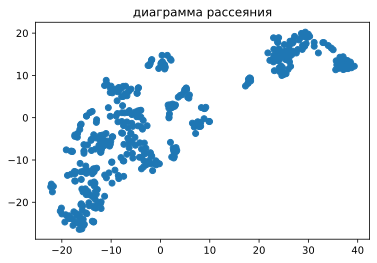

In [11]:
# Строим диаграмму рассеяния на этих данных
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.title('диаграмма рассеяния')
plt.show()

2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах


In [12]:
# Импортируем библиотеку KMeans
from sklearn.cluster import KMeans

In [13]:
# Разбиваем данные из тренировочного набора на 3 кластера
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)


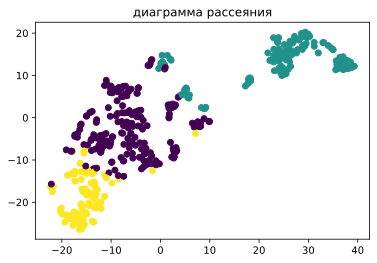

In [14]:
# Строим диаграмму рассеяния на данных TSNE
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.title('диаграмма рассеяния')
plt.show()

In [15]:
# средние значения price в разных кластерах
meat_0 = y_train[labels_train == 0].mean()
print(f'Среднее значение price для 0 кластера :  {round(meat_0,4)}')
meat_1 = y_train[labels_train == 1].mean()
print(f'Среднее значение price для 1 кластера :  {round(meat_1,4)}')
meat_2 = y_train[labels_train == 2].mean()
print(f'Среднее значение price для 2 кластера :  {round(meat_2,4)}')

Среднее значение price для 0 кластера :  24.9581
Среднее значение price для 1 кластера :  16.1654
Среднее значение price для 2 кластера :  27.7884


In [18]:
# средние значения CRIM в разных кластерах
meat_0_crim = X_train.loc[labels_train == 0,'CRIM'].mean()
print(f'Среднее значение CRIM для 0 кластера :  {round(meat_0_crim,4)}')
meat_1_crim = X_train.loc[labels_train == 1,'CRIM'].mean()
print(f'Среднее значение CRIM для 1 кластера :  {round(meat_1_crim,4)}')
meat_2_crim = X_train.loc[labels_train == 2,'CRIM'].mean()
print(f'Среднее значение CRIM для 2 кластера :  {round(meat_2_crim,4)}')


Среднее значение CRIM для 0 кластера :  0.4217
Среднее значение CRIM для 1 кластера :  10.797
Среднее значение CRIM для 2 кластера :  0.0736


3. * Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [19]:
labels_test = model.fit_predict(X_test_scaled)

In [20]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

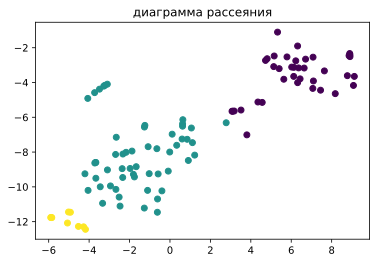

In [21]:
# Строим диаграмму рассеяния на данных из тестового набора
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.title('диаграмма рассеяния')
plt.show()

In [23]:
# средние значения price в разных кластерах
meat_0 = y_test[labels_test == 0].mean()
print(f'Среднее значение price для 0 кластера :  {round(meat_0,4)}')
meat_1 = y_test[labels_test == 1].mean()
print(f'Среднее значение price для 1 кластера :  {round(meat_1,4)}')
meat_2 = y_test[labels_test == 2].mean()
print(f'Среднее значение price для 2 кластера :  {round(meat_2,4)}')

Среднее значение price для 0 кластера :  16.7105
Среднее значение price для 1 кластера :  22.6909
Среднее значение price для 2 кластера :  34.3111


In [25]:
# средние значения CRIM в разных кластерах
meat_0_crim = X_test.loc[labels_test == 0,'CRIM'].mean()
print(f'Среднее значение CRIM для 0 кластера :  {round(meat_0_crim,4)}')
meat_1_crim = X_test.loc[labels_test == 1,'CRIM'].mean()
print(f'Среднее значение CRIM для 1 кластера :  {round(meat_1_crim,4)}')
meat_2_crim = X_test.loc[labels_test == 2,'CRIM'].mean()
print(f'Среднее значение CRIM для 2 кластера :  {round(meat_2_crim,4)}')


Среднее значение CRIM для 0 кластера :  9.4192
Среднее значение CRIM для 1 кластера :  0.2193
Среднее значение CRIM для 2 кластера :  0.0407
